In [2]:

from google.colab import files
a = files.upload()


Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()


,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Input').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_2.groupby('Input')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Input')
_ = plt.ylabel('Sentiment')

In [5]:
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [6]:
np.unique(df_train['Sentiment'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [7]:

df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)


In [8]:
df_train.head(15)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


<Axes: xlabel='Sentiment', ylabel='count'>

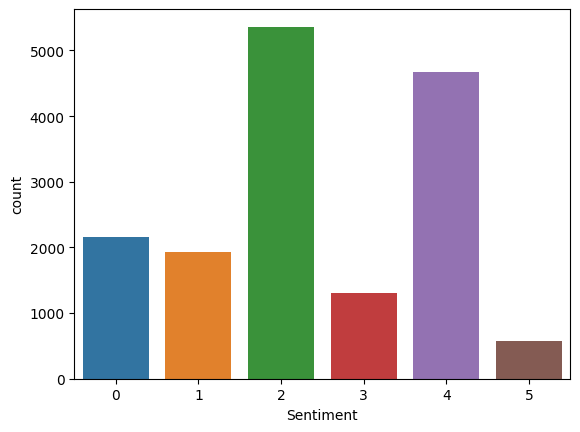

In [9]:
sns.countplot(x="Sentiment",data=df_train)

In [10]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [12]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [13]:
x = df_train["Input"]
y = df_train["Sentiment"]

In [14]:
x.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Input, dtype: object

In [15]:
y.head()

0    4
1    4
2    0
3    3
4    0
Name: Sentiment, dtype: int64

In [16]:
print(x.shape,y.shape)

(16000,) (16000,)


In [17]:
message = x.copy()
voc_size = 10000

In [18]:
message[0]

'i didnt feel humiliated'

In [19]:
import re
import nltk
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:

from nltk.stem.porter import PorterStemmer

In [22]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus[0]

'didnt feel humili'

In [23]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [24]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

In [25]:
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

In [26]:
one_hot_representation[0]

[9352, 1061, 1902]

In [27]:
from keras.preprocessing.sequence import pad_sequences

In [28]:
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 9352, 1061, 1902], dtype=int32)

In [29]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

In [30]:
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513001 (1.96 MB)
Trainable params: 513001 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [34]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


168/168 [==============================] - 28s 138ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/10
168/168 [==============================] - 18s 108ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/10
168/168 [==============================] - 12s 69ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/10
168/168 [==============================] - 12s 70ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/10
168/168 [==============================] - 11s 63ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/10
168/168 [==============================] - 11s 63ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/10
168/168 [==============================] - 12s 69ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/10
168/168 [=======================

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import numpy as np

In [38]:
# def suicide_avoider(x):
#   ps=PorterStemmer()
#   corpus=[]
#   review=re.sub('[^a-zA-Z]',' ',x)
#   review=review.lower()
#   review=review.split()

#   review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
#   review=' '.join(review)
#   corpus.append(review)


#   voc_size = 5000
#   one_hot_r = [one_hot(word,voc_size) for word in corpus]

#   max_length = 20
#   embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

#   dimension = 40
#   model = Sequential()
#   model.add(Embedding(voc_size,dimension,input_length=max_length))
#   model.add(Bidirectional(LSTM(100)))
#   model.add(Dense(1,activation='softmax'))
#   model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
#   prediction= model.predict_classes(np.array(embedded_docs))

#   if prediction.all() ==0:
#     print("person is angry")
#   elif prediction.all() ==1:
#     print("person is in fear")
#   elif prediction.all() ==2:
#     print("person is in joy")
#   elif prediction.all() ==3:
#     print("person is in love")
#   elif prediction.all() ==4:
#     print("person is sad")
#   else:
#     print("person is surprise")
# x = str(input())
# suicide_avoider(x)

# Install necessary libraries
!pip install -q pandas numpy seaborn nltk tensorflow

# Import libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional

# Upload files
# uploaded = files.upload()

# Read the dataset
df_train = pd.read_csv('train.txt', header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')
df_test = pd.read_csv('test.txt', header=None, sep=';', names=['Input', 'Sentiment'], encoding='utf-8')

# Map sentiment labels to numeric values
sentiment_mapping = {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}
df_train['Sentiment'] = df_train['Sentiment'].map(sentiment_mapping)

# Text preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []

for i in range(len(df_train['Input'])):
    review = re.sub('[^a-zA-Z]', ' ', df_train['Input'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Text to one-hot representation using hashing_trick
def hashing_trick(text, n, hash_function=hash):
    return [hash_function(word) % n for word in text.split()]

voc_size = 10000
one_hot_representation = [hashing_trick(words, voc_size) for words in corpus]

# Padding sequences
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation, padding='pre', maxlen=sent_length)

# Model building
dimension = 40
model = Sequential()
model.add(Embedding(voc_size, dimension, input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(6, activation='softmax'))  # Changed the output dimension to 6 for multi-class classification

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Model training
final_input = np.array(embedded_doc)
final_output = np.array(df_train['Sentiment'])

x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Function for emotion prediction
def predict_emotion(x):
    review = re.sub('[^a-zA-Z]', ' ', x)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

    one_hot_r = [hashing_trick(review, voc_size)]
    embedded_docs = pad_sequences(one_hot_r, padding='pre', maxlen=sent_length)

    # Use predict instead of predict_classes
    prediction = np.argmax(model.predict(np.array(embedded_docs)), axis=-1)
    emotions = {0: "anger", 1: "fear", 2: "joy", 3: "love", 4: "sadness", 5: "surprise"}
    print(f"The predicted emotion is: {emotions[prediction[0]]}")

# Test the function
user_input = str(input("Enter a text: "))
predict_emotion(user_input)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 514006 (1.96 MB)
Trainable params: 514006 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
168/168 [==============================] - 17s 74ms/step - loss: 1.4647 - accuracy: 0.4062 - val_loss: 1.1226 - val_accuracy: 0.6394
Epoch 2/10
168/168 [==============================] - 12s 69ms/step